In [1]:
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data
import fix_yahoo_finance
# fix_yahoo_finance.pdr_override()


C:\ProgramData\Anaconda3\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



In [2]:
stock1 = input('주식명+코드.KS 기입: ')
stock2 = input('주식명+코드.KS 기입: ')

주식명+코드.KS 기입: 006400.KS
주식명+코드.KS 기입: 051910.KS


In [3]:
chart_data1 = data.get_data_yahoo(stock1,'2020-01-01','2020-12-31')
chart_data2 = data.get_data_yahoo(stock2,'2020-01-01','2020-12-31')

In [4]:
chart_data_1 = chart_data1.iloc[:,[5]]
chart_data_2 = chart_data2.iloc[:,[5]]

In [5]:
chart = pd.concat([chart_data_1,chart_data_2],axis=1)
chart.columns = ['1','2']
chart

,1,2
Date,,
2020-01-02,232000,314000
2020-01-03,229000,311000
2020-01-06,230000,307000
2020-01-07,231500,311000
2020-01-08,229000,302000
...,...,...
2020-12-23,554000,806000
2020-12-24,563000,818000
2020-12-28,559000,814000


In [6]:
returns = chart.pct_change()
print("상관계수 : ",returns['1'].corr(returns['2']))
print("공분산 : ",returns['1'].cov(returns['2']))
print(returns.var())

상관계수 :  0.791235974521953
공분산 :  0.0009811281235554295
1    0.001180
2    0.001303
dtype: float64


In [7]:
cor = returns['1'].corr(returns['2'])
cov = returns['1'].cov(returns['2'])

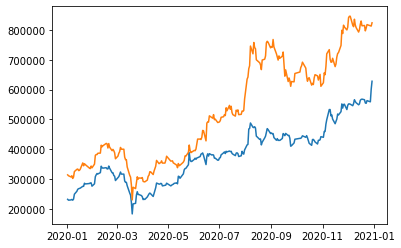

In [8]:
plt.plot(chart)

In [9]:
chart.mean(axis=0)['1']
chart.std(axis=0)['1']

98053.66567859826

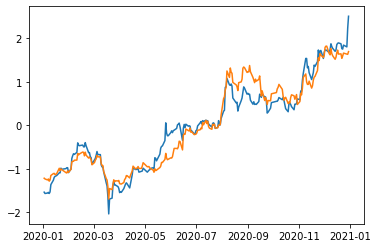

In [10]:
p1 = (chart['1']-chart.mean(axis=0)['1'])/chart.std(axis=0)['1']
p2 = (chart['2']-chart.mean(axis=0)['2'])/chart.std(axis=0)['2']
r = p1-p2
plt.plot(p1)
plt.plot(p2)

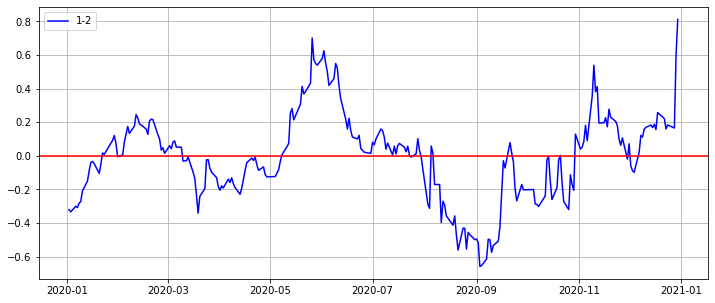

In [11]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(r, color='blue', label='1-2')
ax.grid(True)
ax.axhline(y=0, color='red', linestyle='-') 
plt.legend(loc=2)
plt.show()

2*표준편차 =  0.5264


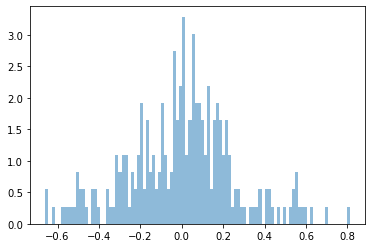

In [12]:
plt.hist(r,bins=100,density=True,alpha=0.5,histtype='stepfilled')
print('2*표준편차 = ',round(2*r.std(),4))

In [13]:
from statsmodels.tsa.stattools import adfuller
x=r.dropna()
result = adfuller(x)
print(result)
print("--------------------------")
print(round(result[1],2))

(-1.9274159301780933, 0.3192757165678238, 0, 247, {'1%': -3.457105309726321, '5%': -2.873313676101283, '10%': -2.5730443824681606}, -451.4070590255451)
--------------------------
0.32


In [14]:
def sigma(n):
    sum = 0
    for k in range(1,n):
        sum+=r[k]
    return sum

sigma(len(r))

0.3202536311274804

In [15]:
from statsmodels.tsa.stattools import coint

def corr(data1, data2):
    "data1 & data2 should be numpy arrays."
    mean1 = data1.mean() 
    mean2 = data2.mean()
    std1 = data1.std()
    std2 = data2.std()
    corr = ((data1*data2).mean()-mean1*mean2)/(std1*std2)
    return corr

stock_name_1 = '1'
stock_name_2 = '2'

score, pvalue, _ = coint(chart_data_1, chart_data_2)
correlation = corr(chart_data_1, chart_data_2)

print(' %s , %s 사이 상관계수: %f' % (stock_name_1, stock_name_2, correlation))
print(' %s , %s 사이 공적분계수 테스트 p값 : %f' % (stock_name_1, stock_name_2, pvalue))

if pvalue < 0.05:
    print("1과 2는 공적분 관계에 있음")
else:
    print("1과 2는 공적분 관계가 아님")


 1 , 2 사이 상관계수: 0.961472
 1 , 2 사이 공적분계수 테스트 p값 : 0.612370
1과 2는 공적분 관계가 아님


In [26]:
## 엑셀로 저장
# chart.to_excel('chart.xlsx')

(-11.259248172911178, 1.6376011853756716e-20, 1, 245, {'1%': -3.4573260719088132, '5%': -2.873410402808354, '10%': -2.573095980841316}, -446.0412554456615)
--------------------------
0.0
정상성이 있음


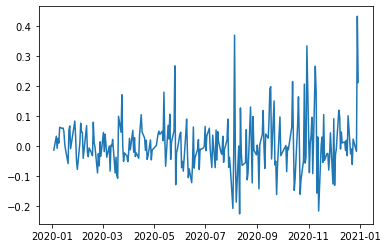

In [16]:
#1차 차분
ydiff = r.diff().dropna()
result = adfuller(ydiff)
print(result)
print("--------------------------")
print(round(result[1],5))
if result[1] < 0.05:
    print('정상성이 있음')
else:
    print('정상성이 없음')
plt.plot(ydiff)

In [35]:
# ydiff.to_excel('ydiff.xlsx')

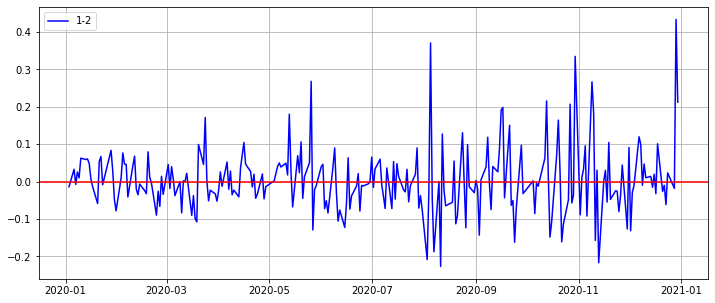

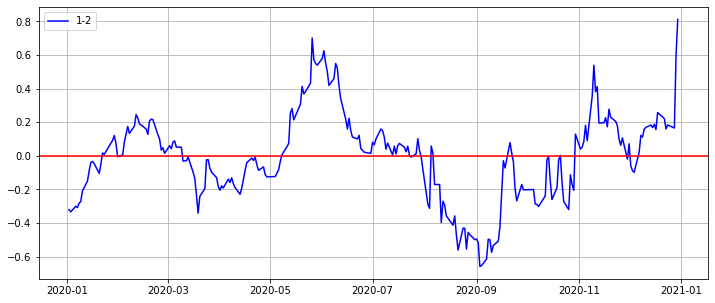

In [17]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(ydiff, color='blue', label='1-2')
ax.grid(True)
ax.axhline(y=0, color='red', linestyle='-') 
plt.legend(loc=2)
plt.show()
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(r, color='blue', label='1-2')
ax.grid(True)
ax.axhline(y=0, color='red', linestyle='-') 
plt.legend(loc=2)
plt.show()

2*표준편차 =  0.1776


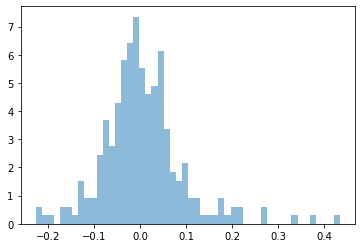

In [18]:
plt.hist(ydiff,bins=50,density=True,alpha=0.5,histtype='stepfilled')
print('2*표준편차 = ',round(2*ydiff.std(),4))

In [19]:
yd = pd.DataFrame(ydiff)
yd[yd[0]>0.1776]

,0
Date,
2020-05-13,0.180281
2020-05-26,0.268324
2020-08-05,0.370761
2020-09-16,0.191650
2020-09-17,0.198547
2020-10-13,0.215653
2020-10-27,0.207262
2020-10-30,0.335028
2020-11-09,0.266968
